## IMPORTS

In [1]:
from CNN_model import (
    prepare_data,
    separate_features_and_labels,
    train_model,
    evaluate_model
)
from constants import (
    EXTRACTED_HEARTBEATS_FOLDER,
    COMBINED_DATA_FOLDER,
    MODEL_FOLDER,
    N_CLASSES
)
from gradcam import (
    make_gradcam_heatmap_1d,
    display_gradcam_timeseries
)

2024-11-27 13:36:27.201599: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## DATA LOADING

In [2]:
# Before running this, please make sure that you have run data_processor.py
train, validation, test = prepare_data(data_folder=EXTRACTED_HEARTBEATS_FOLDER, save_to_folder=COMBINED_DATA_FOLDER)

### FINAL DATA EXPLORATION & CLEANING

In [3]:
train.shape

(239404, 81)

In [4]:
train = train[~train.isna().any(axis=1)]
train.shape

(239403, 81)

In [5]:
validation.shape

(119149, 81)

In [6]:
validation = validation[~validation.isna().any(axis=1)]
validation.shape

(119148, 81)

In [7]:
test.shape

(116243, 81)

In [8]:
test = test[~test.isna().any(axis=1)]
test.shape

(116243, 81)

In [9]:
train.label.describe()

count    239403.000000
mean          0.419744
std           0.493518
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

### DATA BALANCE CHECK

In [10]:
print(train.label.value_counts(), validation.label.value_counts(), test.label.value_counts())

label
0.0    138915
1.0    100488
Name: count, dtype: int64 label
0.0    61720
1.0    57428
Name: count, dtype: int64 label
0    59440
1    56803
Name: count, dtype: int64


### DATA FORMATING

In [11]:
X_train, y_train = separate_features_and_labels(train)
X_validation, y_validation = separate_features_and_labels(validation)
X_test, y_test = separate_features_and_labels(test)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [13]:
X_train.shape

(239403, 80)

## TRAINING THE MODEL

In [14]:
model = train_model(X_train, y_train, X_validation, y_validation, N_CLASSES)

Model: "ECG_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 80, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block1 (Conv1D)            │ (None, 71, 20)         │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_Block1                │ (None, 71, 20)         │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ReLU_Block1 (ReLU)              │ (None, 71, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block2 (Conv1D)            │ (None, 57, 20)         │         6,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_Block2                │ (None, 57, 20)         │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ReLU_Block2 (ReLU)              │ (None, 57, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block3 (Conv1D)            │ (None, 38, 20)         │         8,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_Block3                │ (None, 38, 20)         │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ReLU_Block3 (ReLU)              │ (None, 38, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 760)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_Hidden_Layer (Dense)        │ (None, 30)             │        22,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,392 (146.06 KB)

 Trainable params: 37,272 (145.59 KB)

 Non-trainable params: 120 (480.00 B)

Epoch 1/10
1871/1871 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9975 - loss: 0.0078
Epoch 1: val_accuracy improved from -inf to 0.99471, saving model to /Users/ritwickmanatkar/Documents/Codes/cnn-for-chf-detection/model/CNN_model.keras
1871/1871 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9947 - val_loss: 0.0368 - learning_rate: 0.0010
Epoch 2/10
1870/1871 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9997 - loss: 9.8473e-04
Epoch 2: val_accuracy did not improve from 0.99471
1871/1871 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9997 - loss: 9.8464e-04 - val_accuracy: 0.9928 - val_loss: 0.0493 - learning_rate: 0.0010
Epoch 3/10
1871/1871 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9998 - loss: 5.7235e-04
Epoch 3: val_accuracy did not improve from 0.99471
1871/1871 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9998 - loss: 5.7242e-04 - val_accuracy: 0.9927 - val_loss: 0.0596 - learning_rate: 0.0010
Epoch 4/10
1870/1871 ━━━━━━━

## EVALUATING THE MODEL

3633/3633 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Test f1 score : 0.9941054479944208 
Test accuracy score : 0.9941071720447683 


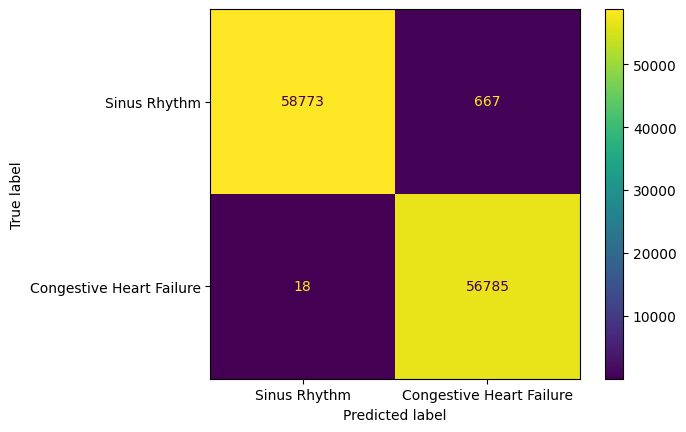

In [15]:
evaluate_model(model, X_test, y_test)

## GradCAM PLOTS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Actual Label: 1 || Predicted Label: 1


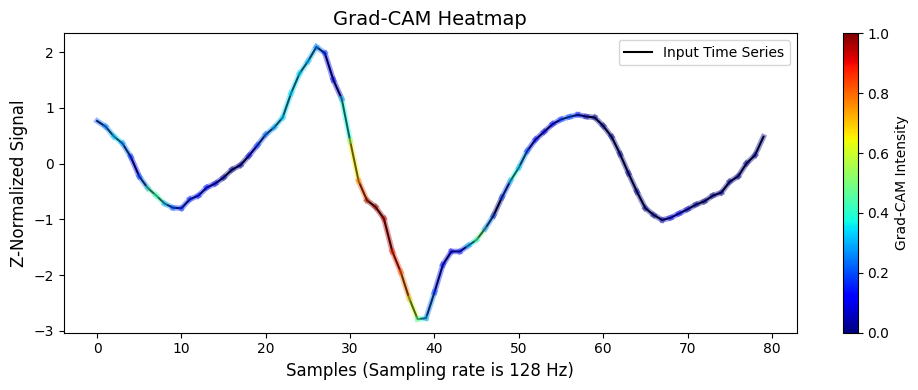

In [56]:
import numpy as np

idx = 108000

print(f"Actual Label: {y_test[idx]} || Predicted Label: {np.argmax(model.predict(np.array([X_test[idx]]),), axis = -1)[0]}")
display_gradcam_timeseries(
    X_test[idx],
    make_gradcam_heatmap_1d(
        np.array([X_test[idx]]),
        model,
        "Conv_Block3",
    )
)